In [29]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [30]:
#reading csv file
healthcare_dataset = pd.read_csv("D:/Sem 6 - Study Materials/Machine_Learning/SA/Healthcare_Investments_and_Hospital_Stay.csv")
print(healthcare_dataset)

    Location  Time  Hospital_Stay  MRI_Units  CT_Scanners  Hospital_Beds
0        AUS  1992            6.6       1.43        16.71           1.43
1        AUS  1994            6.4       2.36        18.48           2.36
2        AUS  1995            6.5       2.89        20.55           2.89
3        AUS  1996            6.4       2.96        21.95           2.96
4        AUS  1997            6.2       3.53        23.34           3.53
..       ...   ...            ...        ...          ...            ...
513      LTU  2014            6.8      10.57        22.17          10.57
514      LTU  2015            6.6      11.02        21.00          11.02
515      LTU  2016            6.6      12.20        23.01          12.20
516      LTU  2017            6.5      12.37        23.33          12.37
517      LTU  2018            6.5      12.49        24.27          12.49

[518 rows x 6 columns]


In [31]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [32]:
def preprocess_inputs(df):
    df = df.copy()
    
    # One-hot encode Location column
    df = onehot_encode(df, column='Location')
    #print(df)
    # Split df into X and y
    y = df['Hospital_Stay'].copy()
    X = df.drop('Hospital_Stay', axis=1).copy()
    
    #splitting into train and test dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
    
    #Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test


In [33]:
X_train, X_test, y_train, y_test = preprocess_inputs(healthcare_dataset)

In [34]:
X_train

,Time,MRI_Units,CT_Scanners,Hospital_Beds,AUS,AUT,BEL,CAN,CZE,DEU,...,LVA,NLD,NZL,POL,PRT,RUS,SVK,SVN,TUR,USA
0,-0.303643,0.502340,-0.349986,0.502340,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
1,-0.738679,-0.697320,-0.873325,-0.697320,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
2,0.131392,-0.562147,-0.392384,-0.562147,-0.207913,-0.207913,-0.177028,-0.215041,4.809712,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
3,0.276404,-0.018076,-0.295665,-0.018076,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,6.262765,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
4,1.001462,1.174825,1.272365,1.174825,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1.146474,-0.248996,-0.302952,-0.248996,-0.207913,-0.207913,-0.177028,-0.215041,4.809712,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
358,0.276404,-0.678170,-0.378472,-0.678170,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,5.648813,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
359,-0.013620,-0.589181,-0.850140,-0.589181,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
360,-0.013620,-0.317709,-0.623580,-0.317709,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,5.181327,-0.140422


In [35]:
print(list(X_train.columns))

['Time', 'MRI_Units', 'CT_Scanners', 'Hospital_Beds', 'AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'NLD', 'NZL', 'POL', 'PRT', 'RUS', 'SVK', 'SVN', 'TUR', 'USA']


In [36]:
y_train

121    7.2
378    7.3
91     6.7
310    6.1
479    5.9
      ... 
98     5.9
322    7.3
382    6.3
365    4.1
510    7.0
Name: Hospital_Stay, Length: 362, dtype: float64

In [37]:
# loading index of randomly splitted data
trindex=list(X_train.index)

# loading index of randomly splitted data
teindex=list(X_test.index)

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
X_test1=X_test

In [38]:
print("Shape Of X_train is: ",X_train.shape)
print("Shape Of y_train is: ",y_train.shape)
print("Shape Of X_test is: ",X_test.shape)
print("Shape Of y_test is: ",y_test.shape)

Shape Of X_train is:  (362, 36)
Shape Of y_train is:  (362,)
Shape Of X_test is:  (156, 36)
Shape Of y_test is:  (156,)


In [39]:
#fitting linear regression line

# creating object of LinearRegression
lin = LinearRegression() 

# fitting line in data values
lin.fit(X_train,y_train)

print("value of coefficients of line are: ",lin.coef_)
print("vaue of intercept of line is: ",lin.intercept_)

value of coefficients of line are:  [-4.66706168e-01 -3.47788420e+12 -7.83898412e-01  3.47788420e+12
 -1.35407388e+12 -1.35407388e+12 -1.16622378e+12 -1.39646493e+12
 -1.35407388e+12 -1.11353360e+12 -5.03614517e+11 -9.98800192e+11
 -1.05789021e+12 -1.62324021e+12 -1.35407388e+12 -9.98800192e+11
 -7.92959676e+11 -1.39646493e+12 -1.05789021e+12 -1.11353360e+12
 -1.26420174e+12 -1.51515078e+12 -9.35610720e+11 -1.26420174e+12
 -1.43736148e+12 -1.16622378e+12 -1.26420174e+12 -1.16622378e+12
 -1.05789021e+12 -1.16622378e+12 -3.56603493e+11 -1.26420174e+12
 -1.16622378e+12 -9.35610720e+11 -1.26420174e+12 -9.35610720e+11]
vaue of intercept of line is:  7.153111726262933


In [40]:
#calculation of average percentage error in predicted price for train set
per=[]
import math
for i in range(y_train.shape[0]):
    Val=lin.predict([X_train[i]])
    temp=(np.abs(Val-(y_train[i]))/(y_train[i]))*100
    per.append(temp)
avgp=sum(per)/len(per)
print("average percentage error for train set is: {}% ".format(avgp[0]))

#calculation of R2 and root mean square error for checking performance of train set
Y_train_predict = lin.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, Y_train_predict)))
r=r2_score(y_train,Y_train_predict)
print("value of R2 for train set is:             ",r)
print("Root mean square value for train set is:  ",rmse)

average percentage error for train set is: 7.249839812963662% 
value of R2 for train set is:              0.8940192128070037
Root mean square value for train set is:   0.8874728840108872


In [41]:
#calculation of average percentage error in predicted price for test set
per1=[]
import math
for i in range(y_test.shape[0]):
    Val=lin.predict([X_test[i]])
    temp=(np.abs(Val-(y_test[i]))/(y_test[i]))*100
    per1.append(temp)
avgp1=sum(per1)/len(per1)
print("average percentage error for test set is: {}% ".format(avgp1[0]))

#calculation of R2 and root mean square error for checking performance of test set
Y_test_predict = lin.predict(X_test)
rmse2 = (np.sqrt(mean_squared_error(y_test, Y_test_predict)))
r2 = r2_score(y_test, Y_test_predict)
print("value of R2 for test set is:             ",r2)
print("Root mean square value for test set is:  ",rmse2)

average percentage error for test set is: 8.489121542856983% 
value of R2 for test set is:              0.851742432210007
Root mean square value for test set is:   0.8248993031510342


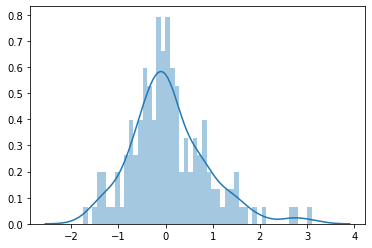

In [42]:
sns.distplot((y_test - Y_test_predict), bins=50); #error curve is Gaussian/ Normalised distribution

In [43]:
# Predicting values
temp=X_test1[0:50]
df1=pd.DataFrame(temp, columns=['Time','MRI_Units','CT_Scanners','Hospital_Beds','AUS','AUT','BEL','CAN','CZE','DEU','DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'NLD', 'NZL', 'POL', 'PRT', 'RUS', 'SVK', 'SVN', 'TUR', 'USA'])
print("Below data is in NORMALIZED FORM")
print(df1)

Below data is in NORMALIZED FORM
        Time  MRI_Units  CT_Scanners  Hospital_Beds       AUS       AUT  \
0  -0.158632  -0.591434    -0.647429      -0.591434 -0.207913 -0.207913   
1   0.856451  -0.465273    -0.295665      -0.465273 -0.207913 -0.207913   
2  -2.623831  -1.110724    -0.848152      -1.110724 -0.207913 -0.207913   
3   0.566427  -0.101433    -0.179073      -0.101433 -0.207913 -0.207913   
4  -0.883690   0.763674     0.461520       0.763674 -0.207913 -0.207913   
5  -1.318726   0.277052     0.331017       0.277052 -0.207913 -0.207913   
6   0.131392   0.870686     0.613885       0.870686 -0.207913  4.809712   
7  -1.463737  -0.700699     0.270733      -0.700699  4.809712 -0.207913   
8  -2.333808  -1.176057    -1.126383      -1.176057 -0.207913 -0.207913   
9  -1.608749   0.076545     0.265434       0.076545 -0.207913 -0.207913   
10  0.566427  -0.500193    -0.302290      -0.500193 -0.207913 -0.207913   
11  0.711439   0.242132     0.131618       0.242132 -0.207913 -0.20

In [44]:
ind=int(input("\nEnter the index no from above data for which you want to predict LOS : "))
LOS=lin.predict([X_test[ind]])

print("\nPREDICTED LENGTH OF STAY IS: ",LOS[0])
print("ORIGINAL LENGTH OF STAY IS : ",y_test[ind])


Enter the index no from above data for which you want to predict LOS : 22

PREDICTED LENGTH OF STAY IS:  4.705113679387933
ORIGINAL LENGTH OF STAY IS :  5.5
